In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv(r"Downloads\heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [7]:
df.shape

(303, 14)

In [8]:
df.size

4242

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
df.target.unique()

array([1, 0], dtype=int64)

In [12]:
# visullization
df.hist(figsize=(14,14).)
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-84eb22584f9b>, line 2)

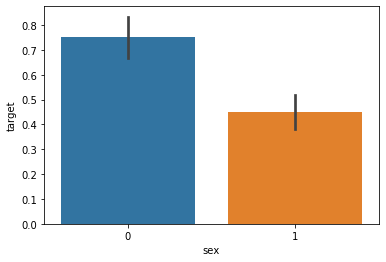

In [13]:
sns.barplot(df['sex'],df['target'])

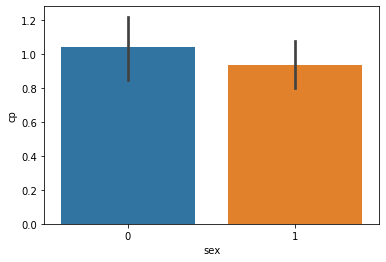

In [14]:
sns.barplot(df['sex'],df['cp'])

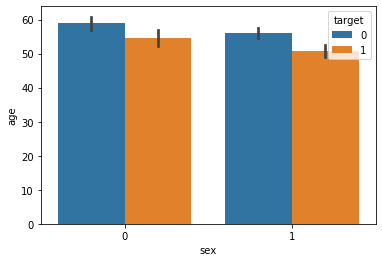

In [15]:
sns.barplot(df['sex'],df['age'],hue=df['target'])

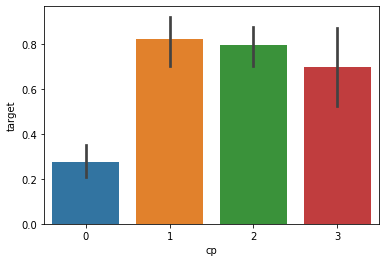

In [16]:
sns.barplot(df['cp'],df['target'])

In [17]:
px.bar(df,df['sex'],df['target'])

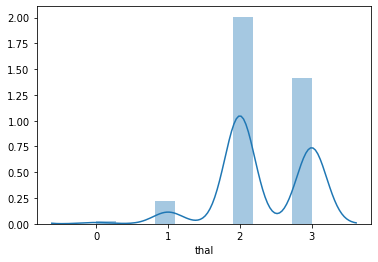

In [18]:
sns.distplot(df['thal'])

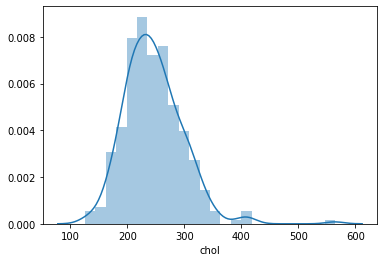

In [19]:
sns.distplot(df['chol'])

1    165
0    138
Name: target, dtype: int64


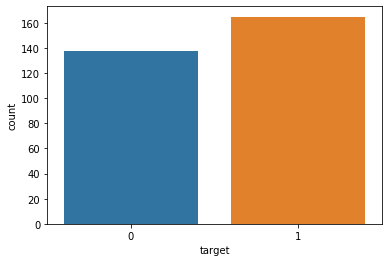

In [20]:
y=df['target']
sns.countplot(y)
target = df.target.value_counts()
print(target)

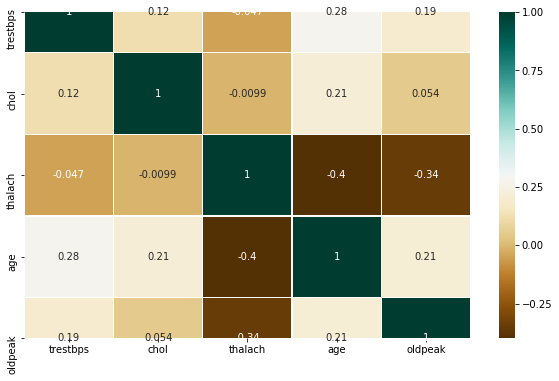

In [21]:
# create a correlation heatmap
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='BrBG',linewidths=0.1)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()


Text(0.5, 1.0, 'Maximum Rate  of Patients without heart disease')

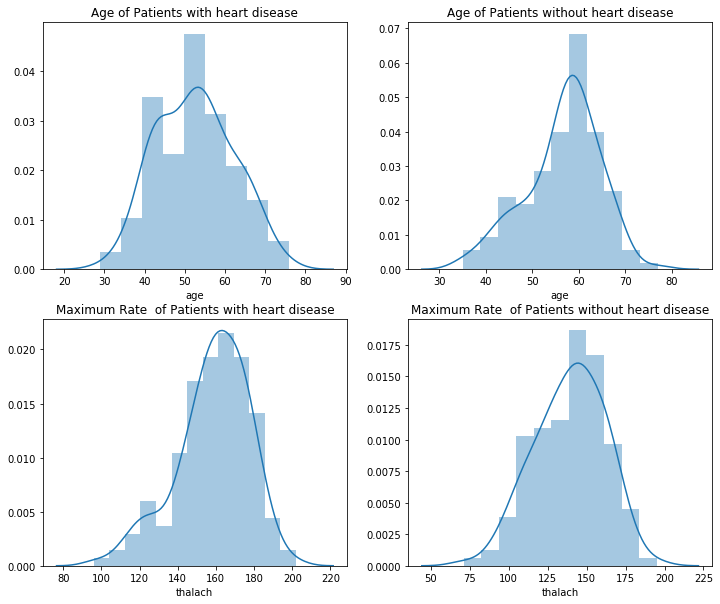

In [22]:
# create four displots

plt.figure(figsize=(12,10))
plt.subplot(222)
sns.distplot(df[df['target']==0].age)
plt.title('Age of Patients without heart disease')

plt.subplot(221)
sns.distplot(df[df['target']==1].age)
plt.title('Age of Patients with heart disease')

plt.subplot(223)
sns.distplot(df[df['target']==1].thalach)
plt.title('Maximum Rate  of Patients with heart disease')


plt.subplot(224)
sns.distplot(df[df['target']==0].thalach)
plt.title('Maximum Rate  of Patients without heart disease')

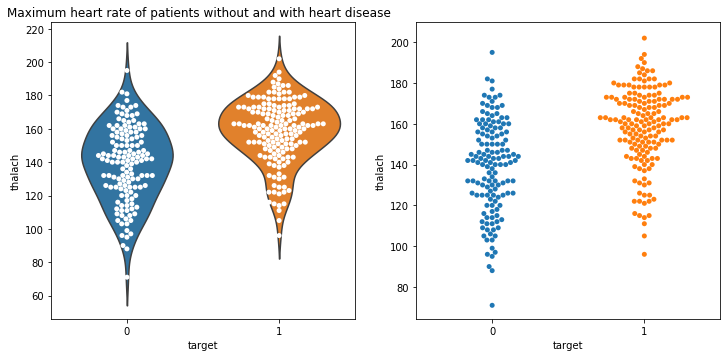

In [23]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.violinplot(data=df,x='target',y='thalach',inner=None)
sns.swarmplot(x="target", y="thalach", data=df, color='w')
plt.title('Maximum heart rate of patients without and with heart disease  ')

plt.subplot(222)
sns.swarmplot(data=df,x='target',y='thalach')

In [36]:
# Data Preprocessing
# stroing in x,y
x,y= df.loc[:,:'thal'],df.loc[:,'target']

In [49]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [38]:
df.shape

(303, 14)

In [50]:
x.shape

(303, 13)

In [51]:
from sklearn.model_selection import train_test_split


In [55]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3,shuffle=True)

In [56]:
print("train_set_x shape:" +str(X_train.shape))
print("train_set_y shape:" +str(y_train.shape))
print("test_set_x shape:" +str(X_train.shape))
print("train_set_y shape:" +str(y_train.shape))

train_set_x shape:(212, 13)
train_set_y shape:(212,)
test_set_x shape:(212, 13)
train_set_y shape:(212,)


In [131]:
X_test.size

1183

In [144]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

#create the Decision tree classifier object
clf = DecisionTreeClassifier()

#train decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [145]:
#predict the response for test dataset
prediction = clf.predict(X_test)

In [146]:
y_test

225    0
152    1
228    0
201    0
52     1
245    0
175    0
168    0
223    0
217    0
111    1
135    1
218    0
12     1
15     1
66     1
97     1
90     1
198    0
103    1
22     1
212    0
226    0
264    0
133    1
216    0
275    0
270    0
154    1
55     1
      ..
74     1
153    1
64     1
296    0
287    0
286    0
236    0
126    1
73     1
20     1
46     1
160    1
232    0
181    0
27     1
173    0
261    0
37     1
101    1
166    0
233    0
184    0
164    1
206    0
248    0
253    0
293    0
76     1
272    0
238    0
Name: target, Length: 91, dtype: int64

In [147]:
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy_dt = accuracy_score(y_test,prediction)*100

In [150]:
accuracy_dt

72.52747252747253

In [159]:
custom_data = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
custom_data_prediction = clf.predict(custom_data)
custom_data_prediction

array([1], dtype=int64)

In [161]:
category=('No you do not have heart disease','Yes you have heart disease')
          

In [162]:
print(category[int(custom_data_prediction)])

Yes you have heart disease


In [154]:
#which Features are most important?
clf.feature_importances_

array([0.06069785, 0.05439406, 0.2588702 , 0.05529081, 0.03701223,
       0.02866931, 0.02736616, 0.07834113, 0.02077385, 0.11526257,
       0.06403911, 0.12481925, 0.07446346])

In [155]:
# you can build the function
def plot_feature_impotance(model):
    plt.figure(figsize=(8,6))
    n_features=13
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),x)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)
    


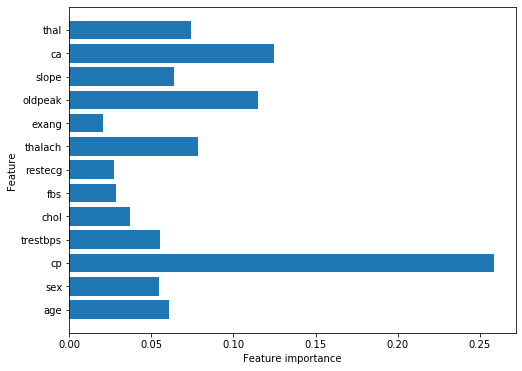

In [156]:
plot_feature_impotance(clf)   

In [166]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

[[33 11]
 [14 33]]
